---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
    
    G_df = pd.read_csv("Employee_Movie_Choices.txt", sep='\t', names = ['employee', 'movie'], header = 0)
    B = nx.Graph()
    B.add_nodes_from(G_df['employee'], bipartite = 0)
    B.add_nodes_from(G_df['movie'], bipartite = 1)
    for ind, row in G_df.iterrows():
        B.add_edge(row['employee'], row['movie'])
        
    return B 

<IPython.core.display.Javascript object>


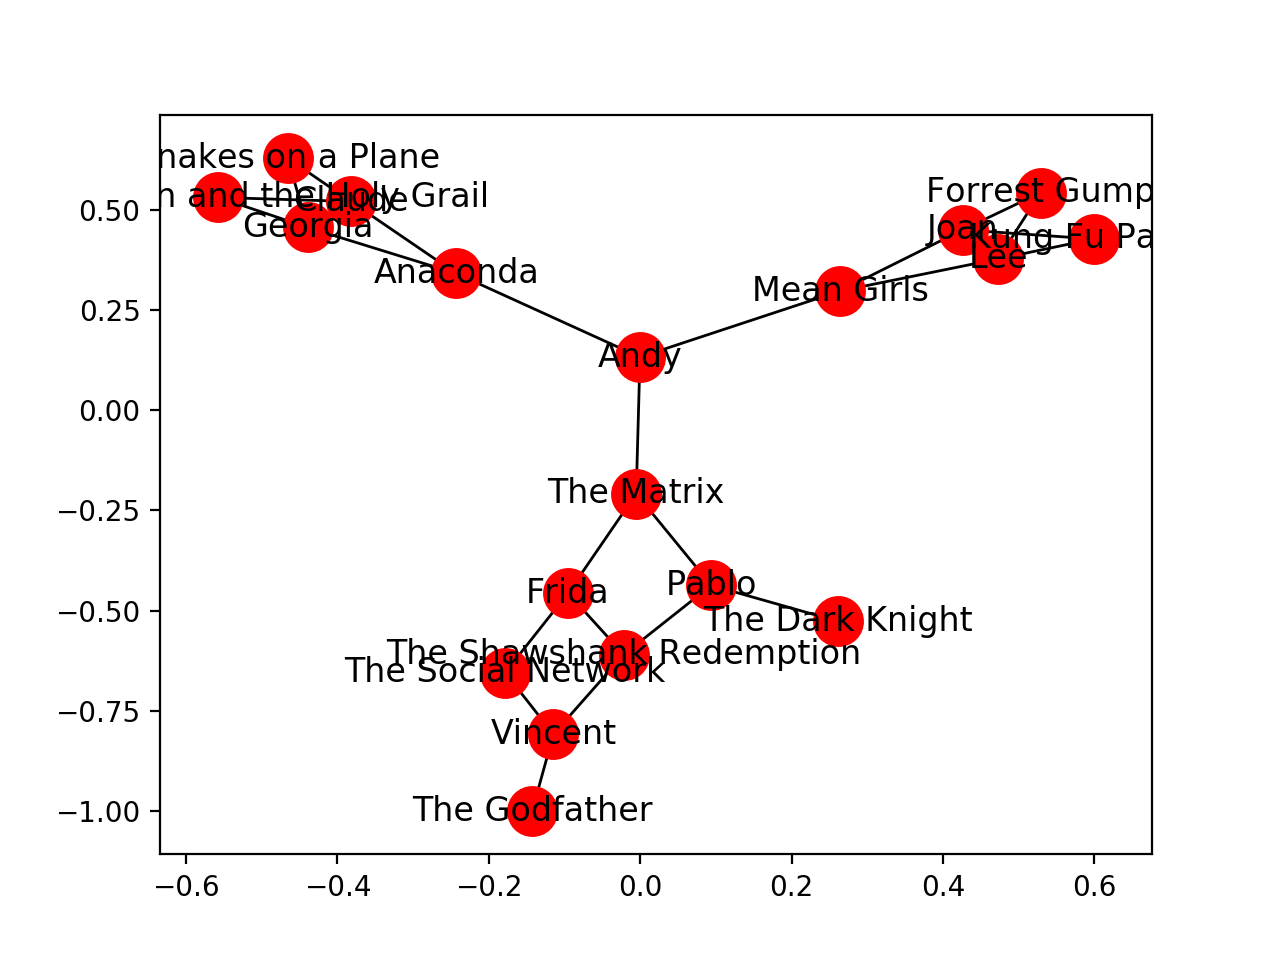

In [3]:
plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [4]:
def answer_two():
    
    B = answer_one()
    G_df = pd.read_csv("Employee_Movie_Choices.txt", sep='\t', names = ['employee', 'movie'], header = 0)
    for col in G_df.columns:
        for entry in G_df[col].unique():
            B.node[entry]['type'] = col
    
    return B

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [5]:
def answer_three():
        
    B = answer_two()
    G_df = pd.read_csv("Employee_Movie_Choices.txt", sep='\t', names = ['employee', 'movie'], header = 0)
    P = bipartite.weighted_projected_graph(B, G_df['employee'])
    
    return P

In [6]:
P = answer_three()

In [21]:
P.edges(data = True)

EdgeDataView([('Andy', 'Lee', {'weight': 1}), ('Andy', 'Joan', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Frida', 'Vincent', {'weight': 2}), ('Frida', 'Pablo', {'weight': 2}), ('Joan', 'Lee', {'weight': 3}), ('Pablo', 'Vincent', {'weight': 1})])

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [82]:
def answer_four():
    
    import numpy as np
    W_df = nx.to_pandas_edgelist(P)
    W_df['score'] = np.nan
    
    R_df = pd.read_csv("Employee_Relationships.txt", sep='\t', \
                   names = ['employee_1', 'employee_2', 'score'], header = None)
    for ind, row in W_df.iterrows():
        W_df.loc[ind, 'score'] = R_df[(R_df['employee_1'] == row['source']) & \
                                      (R_df['employee_2'] == row['target'])]['score'].values[0]
    compare_df = pd.DataFrame(W_df[['weight', 'score']]) 
    
    return compare_df.corr().loc['weight', 'score']